In [26]:
%env CUDA_LAUNCH_BLOCKING=1
%load_ext autoreload
%autoreload complete
# %aimport ...

import sys
import importlib
import warnings

importlib.invalidate_caches()

for mod_name in list(sys.modules):
    if not (str.startswith(mod_name, "robotodo") or str.startswith(mod_name, "tensorspecs")):
        continue
    try:
        importlib.reload(sys.modules[mod_name])
    except Exception as error:
        warnings.warn(f"{error}")


env: CUDA_LAUNCH_BLOCKING=1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from robotodo.engines.isaac._kernel import Kernel

kernel = Kernel([
    "--/log/file=/tmp/todo-isaacsim.log",
    # "--/log/enableStandardStreamOutput=true",
    "--/app/enableStdoutOutput=true",
    # "--no-window",
    # TODO
    # "--/app/content/emptyStageOnStart=false",
    # "--/app/asyncRendering=true",
    # "--enable", "isaacsim.exp.full",
    "--/app/vulkan=",
], kit_path="isaacsim.exp.full.kit")
kernel.start_app_loop_soon()

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json'
[0.125s] [ext: omni.kit.async_engine-0.0.3] startup
[0.742s] [ext: omni.metrics.core-0.0.3] startup
[0.743s] [ext: omni.client.lib-1.1.0] startup
[0.788s] [ext: omni.blobkey-1.1.2] startup
[0.790s] [ext: omni.stats-1.0.1] startup
[0.795s] [ext: omni.datastore-0.0.0] startup
[0.840s] [ext: omni.client-1.3.0] startup
[0.902s] [ext: omni.ujitso.default-1.0.0] startup
[0.907s] [ext: omni.hsscclient-1.1.2] startup
[0.915s] [ext: omni.gpu_foundation.shadercache.vulkan-1.0.0] startup
[0.919s] [ext: omni.assets.plugins-0.0.0] startup
[0.928s] [ext: omni.gpu_foundation-0.0.0] startup


2025-10-15T03:29:00Z s] [Error] [omni.gpu_foundation_factory.plugin] Start up failed. The default graphics plugin cannot be set!


[0.986s] [ext: carb.windowing.plugins-1.0.0] startup
[1.000s] [ext: omni.kit.renderer.init-0.0.0] startup

|---------------------------------------------------------------------------------------------|
| Driver Version: 535.247.01    | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|     |                                  |        |     |            | Bus-ID    |            |
|---------------------------------------------------------------------------------------------|
| 0   | NVIDIA GeForce RTX 3060          | Yes: 0 |     | 12288   MB | 10de      | 0          |
|     |                                  |        |     |            | 2504      | 3157457f.. |
|     |                                  |        |     |            |

2025-10-15T03:29:13Z [14,715ms] [Error] [isaacsim.ros2.bridge.impl.extension] ROS2 Bridge startup failed


[15.568s] [ext: omni.kit.registry.nucleus-0.0.0] startup
[15.830s] app ready


2025-10-15T03:29:15Z [15,897ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-10-15T03:29:15Z [15,897ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-10-15T03:29:15Z [16,049ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


[19.248s] Isaac Sim Full App is loaded.
[omni.kit.registry.nucleus] [tid: 139779289363712] downloading: 'https://d4i3qtqj3r0z5.cloudfront.net/omni.physx.fabric-107.3.18%2B107.3.1.lx64.r.cp311.u353.zip' -> '/tmp/tmpzv5s9hm4/omni.physx.fabric-107.3.18+107.3.1.lx64.r.cp311.u353.zip'...
[omni.kit.registry.nucleus] [tid: 139779289363712] unpacking: /tmp/tmpzv5s9hm4/omni.physx.fabric-107.3.18+107.3.1.lx64.r.cp311.u353.zip -> /home/sysadmin/.local/share/ov/data/exts/v2/omni.physx.fabric-107.3.18+107.3.1.lx64.r.cp311.u353
[omni.kit.registry.nucleus] [tid: 139779289363712] creating a link: /home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/exts/3/omni.physx.fabric-107.3.18+107.3.1.lx64.r.cp311.u353 -> /home/sysadmin/.local/share/ov/data/exts/v2/omni.physx.fabric-107.3.18+107.3.1.lx64.r.cp311.u353


In [69]:
# TODO 
from robotodo.engines.isaac.builder import load_usd_scene

# TODO set up axis
scene = await load_usd_scene(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd",
    # "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/gridroom_black.usd",
    _kernel=kernel,
)

In [28]:
await scene.step()

[636.771s] Pulling extension: `omni.physx.fabric-107.3.18` from the registry.
[640.050s] Extension: `omni.physx.fabric-107.3.18` was installed.
[640.057s] [ext: omni.physx.fabric-107.3.18] startup
[643.476s] [ext: omni.physx.fabric-107.3.18] shutdown
[645.326s] [ext: omni.physx.fabric-107.3.18] startup
[647.910s] [ext: omni.physx.fabric-107.3.18] shutdown


In [ ]:
scene._isaac_physx_simulation.detach_stage()

2025-10-15T03:44:07Z [908,520ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_01.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.
2025-10-15T03:44:24Z [925,288ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_01.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.


In [ ]:
s = scene._isaac_physx_simulation
s.get_attached_stage()


9223003

In [ ]:
from robotodo.engines.isaac.scene import Scene
from robotodo.engines.isaac.builder import load_urdf, load_usd, build_camera
from robotodo.utils.pose import Pose


# scene = Scene(_kernel=kernel)


# panda = await load_urdf(
#     "./todo-curobo-sample-configs/franka/franka_description/franka_panda.urdf", 
#     scene=scene, 
#     fix_root_link=True,
# )


mug = await load_usd(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Props/Mugs/SM_Mug_A2.usd",
    scene=scene,
)

mug.collidable = True
mug.rigid_body.enabled = True
mug.pose = Pose(p=[.5, .5, .5])



2025-10-15T03:32:09Z [190,589ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_01.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.
2025-10-15T03:32:28Z [209,423ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_01.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.


In [38]:
from robotodo.engines.isaac.scene import Scene
from robotodo.engines.isaac.builder import load_urdf, load_usd, build_camera
from robotodo.utils.pose import Pose


# scene = Scene(_kernel=kernel)


panda = await load_urdf(
    "./todo-curobo-sample-configs/franka/franka_description/franka_panda.urdf", 
    scene=scene, 
    fix_root_link=True,
)


2025-10-15T03:51:05Z [1,326,471ms] [Error] [omni.usd] Runtime Error: in Create at line 46 of /builds/omniverse/usd-ci/USD/pxr/usd/ar/filesystemWritableAsset.cpp -- Could not create directory '/configuration/' for asset '/configuration/anon:0x5f6b4f50:tmp_sensor.usd'

2025-10-15T03:51:05Z [1,326,471ms] [Error] [omni.usd] Runtime Error: in StartPacking at line 2462 of /builds/omniverse/usd-ci/USD/pxr/usd/usd/crateFile.cpp -- Unable to open /configuration/anon:0x5f6b4f50:tmp_sensor.usd for write

2025-10-15T03:51:05Z [1,326,471ms] [Error] [omni.usd] Runtime Error: in Create at line 46 of /builds/omniverse/usd-ci/USD/pxr/usd/ar/filesystemWritableAsset.cpp -- Could not create directory '/configuration/' for asset '/configuration/anon:0x5f6b4f50:tmp_physics.usd'

2025-10-15T03:51:05Z [1,326,471ms] [Error] [omni.usd] Runtime Error: in StartPacking at line 2462 of /builds/omniverse/usd-ci/USD/pxr/usd/usd/crateFile.cpp -- Unable to open /configuration/anon:0x5f6b4f50:tmp_physics.usd for write



In [37]:
import omni

t = omni.timeline
timeline = t.acquire_timeline_interface()


timeline.get_timeline_event_stream()

In [60]:
import omni


omni.physx.acquire_physx_simulation_interface().get_attached_stage()

0

In [75]:
p = omni.physx.acquire_physx_interface()
# p.start_simulation()
p.is_running()

False

In [76]:
# p.reset_simulation()
p.start_simulation()

In [77]:
omni.physics.tensors.create_simulation_view("torch")

In [ ]:
from robotodo.engines.isaac.builder import load_urdf, load_usd, build_camera


cam = await build_camera(scene=scene)

cam

In [ ]:
# TODO
class Joint:
    pass

In [5]:
panda.link_names

['base_link',
 'panda_link0',
 'panda_link1',
 'panda_link2',
 'panda_link3',
 'panda_link4',
 'panda_link5',
 'panda_link6',
 'panda_link7',
 'panda_link8',
 'right_gripper',
 'panda_hand',
 'ee_link',
 'panda_leftfinger',
 'panda_rightfinger']

In [7]:
stage = scene._usd_stage

In [10]:
import pxr

todo_joint = pxr.UsdPhysics.FixedJoint.Define(stage, "/TODOJoint")


In [14]:
rel = todo_joint.CreateBody0Rel()
rel.SetTargets

<bound method SetTargets of Usd.Prim(</TODOJoint>).GetRelationship('physics:body0')>

In [24]:
panda_hand_joint = pxr.UsdPhysics.FixedJoint.Get(stage, "/_01/joints/panda_hand_joint")

rel = panda_hand_joint.GetBody0Rel()
rel.GetTargets()

[Sdf.Path('/_01/panda_link8')]

In [25]:
rel = panda_hand_joint.GetBody1Rel()
rel.GetTargets()

[Sdf.Path('/_01/panda_hand')]

In [52]:
# panda_hand_joint.CreateLocalPos1Attr(pxr.Gf.Vec3f(0.0, 0.0, 0.0))
rel.AddTarget(cam._usd_prims[0].GetPath())

True

Pose(p=array([[0., 0., 0.]]), q=array([[0., 0., 0., 1.]]))

In [62]:
from robotodo.engines.isaac.sensors import Camera

cam_todo = Camera("/Cube/_05", scene=scene)

In [73]:
Camera("/_05", scene=scene).pose

Pose(p=array([[0., 0., 0.]]), q=array([[0., 0., 0., 1.]]))

2025-10-14T06:37:58Z [9,657,784ms] [Error] [omni.physx.plugin] PhysicsUSD: CreateJoint - you cannot create a joint between a body and itself (both joint bodies must be unique) for joint prim: /TODOJoint


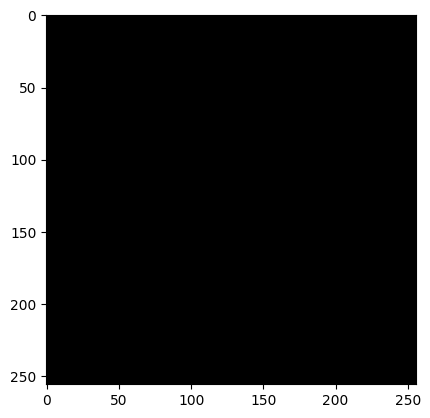

In [66]:
import matplotlib.pyplot as plt

plt.imshow((await cam_todo.read_rgba())[0].cpu())

In [67]:
cam_todo.pose

Pose(p=array([[-0.51107341,  0.74414229,  0.15000001]]), q=array([[0., 0., 0., 1.]]))

In [76]:
cam_todo.pose

Pose(p=array([[-0.51107222,  0.74414078,  0.4911433 ]]), q=array([[0., 0., 0., 1.]]))

Usd.Prim(</_05>)

In [47]:
dir(cam)

['Resolution',
 '_Camera__usd_prim_helper',
 '_IsaacRenderName',
 '_RESOLUTION_DEFAULT',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_isaac_get_frame',
 '_isaac_get_render_annotator',
 '_isaac_get_render_product',
 '_isaac_get_render_targets',
 '_path',
 '_scene',
 '_usd_prims',
 'pose',
 'read_depth',
 'read_rgba']

In [ ]:
import pxr

p = stage.GetPrimAtPath("/_01/joints/panda_finger_joint1")


In [82]:
import omni

# TODO
# kernel.enable_extension("omni.usd")
# kernel.enable_extension("omni.kit.commands")

is_success, _ = omni.kit.commands.execute(
    "MovePrim",
    path_from="/_03",
    path_to="/Cube/_03",
    stage_or_context=stage,
)

stage.GetPrimAtPath("/Cube/_03")

Usd.Prim(</Cube/_03>)

In [83]:
import isaacsim

isaacsim.core.cloner?

Type:        module
String form: <module 'isaacsim.core.cloner' from '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/isaacsim/exts/isaacsim.core.cloner/isaacsim/core/cloner/__init__.py'>
File:        ~/lab/robotodo/.conda/lib/python3.11/site-packages/isaacsim/exts/isaacsim.core.cloner/isaacsim/core/cloner/__init__.py
Docstring:   <no docstring>

In [89]:
kernel.get_settings().get("/physics/autocreatePhysicsScene")
# kernel.get_settings().get("/persistent/physics/autocreatePhysicsScene")

In [111]:
scene._isaac_physics_tensor_view.get_gravity()

carb.Float3(0,0,-9.81)